In [1]:
# !pip install umap
# !pip install umap-learn
# !pip install nb_black
# !pip install plotly

In [2]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import umap

from sklearn import datasets, metrics
from scipy.cluster.hierarchy import dendrogram, linkage

from prince import MCA, FAMD

import plotly.express as px
from ipywidgets import interact

import ast

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

<IPython.core.display.Javascript object>

In [4]:
spotify = pd.read_excel("data/Hot_100_Audio_Features.xlsx")
spotify.head()

SongID  \
0                      AdictoTainy, Anuel AA & Ozuna   
1  The Ones That Didn't Make It Back HomeJustin M...   
2                  ShallowLady Gaga & Bradley Cooper   
3                EnemiesPost Malone Featuring DaBaby   
4    Bacc At It AgainYella Beezy, Gucci Mane & Quavo   

                         Performer                                    Song  \
0          Tainy, Anuel AA & Ozuna                                  Adicto   
1                     Justin Moore  The Ones That Didn't Make It Back Home   
2       Lady Gaga & Bradley Cooper                                 Shallow   
3     Post Malone Featuring DaBaby                                 Enemies   
4  Yella Beezy, Gucci Mane & Quavo                        Bacc At It Again   

                                       spotify_genre        spotify_track_id  \
0                                  ['pop reggaeton']  3jbT1Y5MoPwEIpZndDDwVq   
1  ['arkansas country', 'contemporary country', '...                     NaN   
2                               ['dance pop', 'pop']  2VxeLyX666F8uXCJ0dZF8B   
3                  ['dfw rap', 'melodic rap', 'rap']  0Xek5rqai2jcOWCYWJfVCF   
4     ['dfw rap', 'rap', 'southern hip hop', 'trap']  2biNa12dMbHJrHVFRt8JyO   

                           spotify_track_preview_url  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  https://p.scdn.co/mp3-preview/fa6fa6f6f363be29...   

              spotify_track_album  spotify_track_explicit  \
0  Adicto (with Anuel AA & Ozuna)                     0.0   
1                             NaN                     NaN   
2       A Star Is Born Soundtrack                     0.0   
3            Hollywood's Bleeding                     1.0   
4                Bacc At It Again                     1.0   

   spotify_track_duration_ms  spotify_track_popularity  ...   key  loudness  \
0                   270740.0                      91.0  ...  10.0    -4.803   
1                        NaN                       NaN  ...   NaN       NaN   
2                   215733.0                      88.0  ...   7.0    -6.362   
3                   196760.0                      86.0  ...   6.0    -4.169   
4                   228185.0                      61.0  ...   8.0    -5.725   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0   0.0       0.0735       0.01700          0.000016    0.1790    0.623   
1   NaN          NaN           NaN               NaN       NaN      NaN   
2   1.0       0.0308       0.37100          0.000000    0.2310    0.323   
3   1.0       0.2100       0.05880          0.000000    0.0955    0.667   
4   0.0       0.1680       0.00124          0.000001    0.0716    0.856   

     tempo  time_signature  
0   80.002             4.0  
1      NaN             NaN  
2   95.799             4.0  
3   76.388             4.0  
4  135.979             4.0  

[5 rows x 22 columns]

<IPython.core.display.Javascript object>

In [5]:
spotify = spotify.drop_duplicates()

<IPython.core.display.Javascript object>

In [6]:
spotify = spotify.drop(
    columns=[
        "spotify_track_id",
        "spotify_track_preview_url",
    ]
)

<IPython.core.display.Javascript object>

In [7]:
spotify.shape

(28470, 20)

<IPython.core.display.Javascript object>

In [8]:
spotify.head()

SongID  \
0                      AdictoTainy, Anuel AA & Ozuna   
1  The Ones That Didn't Make It Back HomeJustin M...   
2                  ShallowLady Gaga & Bradley Cooper   
3                EnemiesPost Malone Featuring DaBaby   
4    Bacc At It AgainYella Beezy, Gucci Mane & Quavo   

                         Performer                                    Song  \
0          Tainy, Anuel AA & Ozuna                                  Adicto   
1                     Justin Moore  The Ones That Didn't Make It Back Home   
2       Lady Gaga & Bradley Cooper                                 Shallow   
3     Post Malone Featuring DaBaby                                 Enemies   
4  Yella Beezy, Gucci Mane & Quavo                        Bacc At It Again   

                                       spotify_genre  \
0                                  ['pop reggaeton']   
1  ['arkansas country', 'contemporary country', '...   
2                               ['dance pop', 'pop']   
3                  ['dfw rap', 'melodic rap', 'rap']   
4     ['dfw rap', 'rap', 'southern hip hop', 'trap']   

              spotify_track_album  spotify_track_explicit  \
0  Adicto (with Anuel AA & Ozuna)                     0.0   
1                             NaN                     NaN   
2       A Star Is Born Soundtrack                     0.0   
3            Hollywood's Bleeding                     1.0   
4                Bacc At It Again                     1.0   

   spotify_track_duration_ms  spotify_track_popularity  danceability  energy  \
0                   270740.0                      91.0         0.734   0.836   
1                        NaN                       NaN           NaN     NaN   
2                   215733.0                      88.0         0.572   0.385   
3                   196760.0                      86.0         0.542   0.674   
4                   228185.0                      61.0         0.948   0.623   

    key  loudness  mode  speechiness  acousticness  instrumentalness  \
0  10.0    -4.803   0.0       0.0735       0.01700          0.000016   
1   NaN       NaN   NaN          NaN           NaN               NaN   
2   7.0    -6.362   1.0       0.0308       0.37100          0.000000   
3   6.0    -4.169   1.0       0.2100       0.05880          0.000000   
4   8.0    -5.725   0.0       0.1680       0.00124          0.000001   

   liveness  valence    tempo  time_signature  
0    0.1790    0.623   80.002             4.0  
1       NaN      NaN      NaN             NaN  
2    0.2310    0.323   95.799             4.0  
3    0.0955    0.667   76.388             4.0  
4    0.0716    0.856  135.979             4.0

<IPython.core.display.Javascript object>

In [9]:
spotify.dtypes

SongID                        object
Performer                     object
Song                          object
spotify_genre                 object
spotify_track_album           object
spotify_track_explicit       float64
spotify_track_duration_ms    float64
spotify_track_popularity     float64
danceability                 float64
energy                       float64
key                          float64
loudness                     float64
mode                         float64
speechiness                  float64
acousticness                 float64
instrumentalness             float64
liveness                     float64
valence                      float64
tempo                        float64
time_signature               float64
dtype: object

<IPython.core.display.Javascript object>

In [10]:
spotify.isna().mean()

SongID                       0.000000
Performer                    0.000000
Song                         0.000000
spotify_genre                0.043133
spotify_track_album          0.166737
spotify_track_explicit       0.166526
spotify_track_duration_ms    0.166526
spotify_track_popularity     0.166526
danceability                 0.168739
energy                       0.168739
key                          0.168739
loudness                     0.168739
mode                         0.168739
speechiness                  0.168739
acousticness                 0.168739
instrumentalness             0.168739
liveness                     0.168739
valence                      0.168739
tempo                        0.168739
time_signature               0.168739
dtype: float64

<IPython.core.display.Javascript object>

# Fill null values

In [11]:
spotify["spotify_track_album"].fillna(" ", inplace=True)
spotify["spotify_genre"].fillna("[]", inplace=True)

# Reformat the genre list
spotify["spotify_genre_list"] = spotify["spotify_genre"].apply(ast.literal_eval)

<IPython.core.display.Javascript object>

In [12]:
spotify.rename(
    columns={
        "spotify_genre": "genre_str",
        "spotify_genre_list": "genre_list",
        "spotify_track_album": "album",
        "spotify_track_explicit": "explicit",
    },
    inplace=True,
)

<IPython.core.display.Javascript object>

In [13]:
# Try to change all columns to numeric
# if theres an error, ignore it and move to next column
spotify = spotify.apply(pd.to_numeric, errors="ignore")

<IPython.core.display.Javascript object>

In [14]:
spotify["explicit"].fillna("Not filled", inplace=True)

# Fill N/As with mean values
null_cols = [
    "spotify_track_duration_ms",
    "spotify_track_popularity",
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "time_signature",
]

for col in null_cols:
    spotify[col].fillna(spotify[col].mean(), inplace=True)

<IPython.core.display.Javascript object>

# Determine the specific single genre for each song

In [15]:
spotify["genre_str"].value_counts().head(30)

[]                                                                                                      3769
['contemporary country', 'country', 'country road']                                                      314
['contemporary country', 'country', 'country road', 'modern country rock']                               279
['dance pop', 'pop', 'post-teen pop']                                                                    251
['glee club', 'hollywood', 'post-teen pop']                                                              205
['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap', 'toronto rap']                         138
['deep adult standards']                                                                                 129
['adult standards', 'easy listening', 'lounge']                                                          128
['bubblegum pop']                                                                                        127
['freestyle']      

<IPython.core.display.Javascript object>

In [16]:
# The genre list order matters because the later genres override the eariler ones
# For example, if a song has both 'pop' and 'hip hop', the resulting genre would be 'hip hop'
# I did this because a large number of songs are in the 'pop' genre
genre_list = [
    "pop",
    "rock",
    "hip hop",
    "blues",
    "metal",
    "country",
    "disco",
    "jazz",
    "classical",
]

for genre in genre_list:
    spotify[genre] = spotify["genre_str"].str.contains(fr"\b{genre}\b")
    spotify.loc[spotify[genre], "genre_label"] = genre

spotify = spotify.drop(columns=genre_list)

<IPython.core.display.Javascript object>

In [17]:
spotify["genre_label"].value_counts()

rock         6044
pop          4317
country      3155
hip hop      2747
disco        1519
blues        1480
jazz         1178
metal         826
classical      43
Name: genre_label, dtype: int64

<IPython.core.display.Javascript object>

In [18]:
spotify = spotify[~spotify["genre_label"].isna()]

<IPython.core.display.Javascript object>

In [19]:
spotify.describe()

spotify_track_duration_ms  spotify_track_popularity  danceability  \
count               2.130900e+04              21309.000000  21309.000000   
mean                2.234674e+05                 43.105597      0.597433   
std                 6.096863e+04                 20.148951      0.144801   
min                 2.968800e+04                  0.000000      0.000000   
25%                 1.848400e+05                 29.000000      0.511000   
50%                 2.213909e+05                 42.000000      0.598255   
75%                 2.507730e+05                 58.000000      0.692000   
max                 1.561133e+06                100.000000      0.986000   

             energy           key      loudness          mode   speechiness  \
count  21309.000000  21309.000000  21309.000000  21309.000000  21309.000000   
mean       0.625797      5.220980     -8.524885      0.731515      0.071862   
std        0.188808      3.387771      3.412636      0.422246      0.075953   
min        0.020400      0.000000    -28.030000      0.000000      0.000000   
25%        0.503000      2.000000    -10.554000      0.729612      0.032600   
50%        0.618042      5.239584     -8.523000      1.000000      0.043900   
75%        0.771000      8.000000     -5.931000      1.000000      0.071769   
max        0.996000     11.000000      0.175000      1.000000      0.894000   

       acousticness  instrumentalness      liveness       valence  \
count  21309.000000      21309.000000  21309.000000  21309.000000   
mean       0.281639          0.025862      0.192137      0.599719   
std        0.262125          0.109516      0.150935      0.226942   
min        0.000003          0.000000      0.009670      0.000000   
25%        0.051800          0.000000      0.094700      0.437000   
50%        0.224000          0.000010      0.144000      0.605261   
75%        0.433000          0.002030      0.231000      0.779000   
max        0.989000          0.981000      0.999000      0.990000   

              tempo  time_signature  
count  21309.000000    21309.000000  
mean     120.569629        3.936387  
std       26.735431        0.297915  
min        0.000000        0.000000  
25%      101.227000        4.000000  
50%      120.199492        4.000000  
75%      134.303000        4.000000  
max      216.200000        5.000000

<IPython.core.display.Javascript object>

In [20]:
spotify[["Performer", "genre_list"]]

Performer  \
0              Tainy, Anuel AA & Ozuna   
1                         Justin Moore   
2           Lady Gaga & Bradley Cooper   
4      Yella Beezy, Gucci Mane & Quavo   
5                         Taylor Swift   
...                                ...   
28486                          Genesis   
28487            The Smashing Pumpkins   
28488                      Rod Stewart   
28489                      BLACKstreet   
28491                    Solomon Burke   

                                              genre_list  
0                                        [pop reggaeton]  
1      [arkansas country, contemporary country, count...  
2                                       [dance pop, pop]  
4                 [dfw rap, rap, southern hip hop, trap]  
5                        [dance pop, pop, post-teen pop]  
...                                                  ...  
28486  [album rock, art rock, classic rock, mellow go...  
28487  [alternative metal, alternative rock, grunge, ...  
28488          [adult standards, mellow gold, soft rock]  
28489  [boy band, dance pop, hip hop, hip pop, neo so...  
28491  [brill building pop, classic soul, funk, motow...  

[21309 rows x 2 columns]

<IPython.core.display.Javascript object>

In [21]:
spotify.isna().mean()

SongID                       0.0
Performer                    0.0
Song                         0.0
genre_str                    0.0
album                        0.0
explicit                     0.0
spotify_track_duration_ms    0.0
spotify_track_popularity     0.0
danceability                 0.0
energy                       0.0
key                          0.0
loudness                     0.0
mode                         0.0
speechiness                  0.0
acousticness                 0.0
instrumentalness             0.0
liveness                     0.0
valence                      0.0
tempo                        0.0
time_signature               0.0
genre_list                   0.0
genre_label                  0.0
dtype: float64

<IPython.core.display.Javascript object>

In [22]:
model_df = spotify.drop(
    columns=[
        "SongID",
        "Performer",
        "Song",
        "genre_str",
        "album",
        "genre_list",
        "explicit",
        "spotify_track_duration_ms",
        "spotify_track_popularity",
    ]
)

model_df = model_df.dropna()
model_df

danceability    energy        key   loudness      mode  speechiness  \
0          0.734000  0.836000  10.000000  -4.803000  0.000000     0.073500   
1          0.598255  0.618042   5.239584  -8.714603  0.729612     0.071769   
2          0.572000  0.385000   7.000000  -6.362000  1.000000     0.030800   
4          0.948000  0.623000   8.000000  -5.725000  0.000000     0.168000   
5          0.292000  0.574000   0.000000  -9.375000  1.000000     0.040100   
...             ...       ...        ...        ...       ...          ...   
28486      0.571000  0.502000   7.000000 -14.405000  1.000000     0.030300   
28487      0.287000  0.670000   6.000000  -9.381000  1.000000     0.036800   
28488      0.550000  0.514000  11.000000 -12.617000  1.000000     0.052300   
28489      0.585000  0.573000   6.000000  -5.561000  0.000000     0.075900   
28491      0.318000  0.476000   7.000000  -9.534000  1.000000     0.029000   

       acousticness  instrumentalness  liveness   valence       tempo  \
0          0.017000          0.000016  0.179000  0.623000   80.002000   
1          0.296133          0.033268  0.192624  0.605261  120.199492   
2          0.371000          0.000000  0.231000  0.323000   95.799000   
4          0.001240          0.000001  0.071600  0.856000  135.979000   
5          0.120000          0.005690  0.066300  0.166000  124.344000   
...             ...               ...       ...       ...         ...   
28486      0.015800          0.014000  0.084900  0.316000   98.058000   
28487      0.000063          0.748000  0.237000  0.222000  148.928000   
28488      0.336000          0.125000  0.382000  0.724000  136.542000   
28489      0.133000          0.000011  0.173000  0.591000   76.060000   
28491      0.401000          0.000000  0.600000  0.633000  173.305000   

       time_signature genre_label  
0            4.000000         pop  
1            3.930745     country  
2            4.000000         pop  
4            4.000000     hip hop  
5            4.000000         pop  
...               ...         ...  
28486        4.000000        rock  
28487        4.000000       metal  
28488        3.000000        rock  
28489        4.000000     hip hop  
28491        3.000000        jazz  

[21309 rows x 13 columns]

<IPython.core.display.Javascript object>

In [23]:
model_df["genre_label"] = model_df["genre_label"].astype("category").cat.codes
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21309 entries, 0 to 28491
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      21309 non-null  float64
 1   energy            21309 non-null  float64
 2   key               21309 non-null  float64
 3   loudness          21309 non-null  float64
 4   mode              21309 non-null  float64
 5   speechiness       21309 non-null  float64
 6   acousticness      21309 non-null  float64
 7   instrumentalness  21309 non-null  float64
 8   liveness          21309 non-null  float64
 9   valence           21309 non-null  float64
 10  tempo             21309 non-null  float64
 11  time_signature    21309 non-null  float64
 12  genre_label       21309 non-null  int8   
dtypes: float64(12), int8(1)
memory usage: 2.1 MB


<IPython.core.display.Javascript object>

In [24]:
model_df.isna().mean()

danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
time_signature      0.0
genre_label         0.0
dtype: float64

<IPython.core.display.Javascript object>

# K-means analysis, 10000 rows

In [25]:
samp = model_df.sample(10000, axis=0, random_state=66)
samp_spot = spotify.sample(10000, axis=0, random_state=66)

X = samp.drop(columns=["genre_label"])
y = samp["genre_label"]

<IPython.core.display.Javascript object>

In [26]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

<IPython.core.display.Javascript object>

Clusters (k) = 2
Silhouette score: 0.09910454249227973, ARI score: 0.010761184038025983


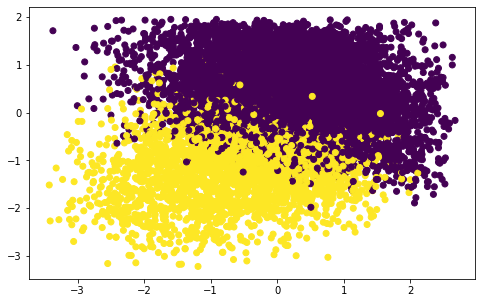

Clusters (k) = 3
Silhouette score: 0.0039850513800426075, ARI score: 0.018407148695659258


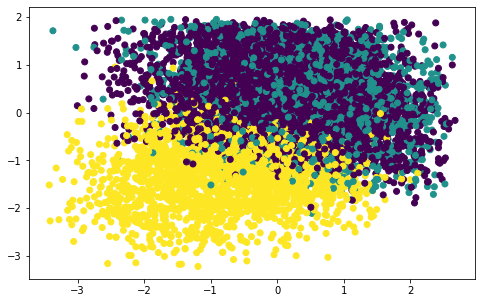

Clusters (k) = 4
Silhouette score: -0.048693694603704325, ARI score: 0.019684168453233064


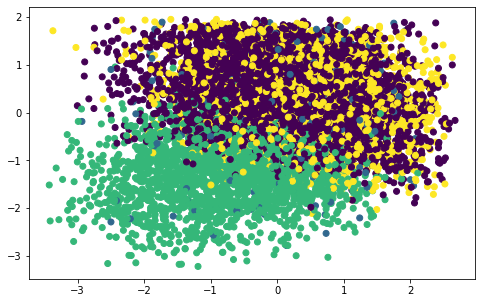

Clusters (k) = 5
Silhouette score: -0.042363024913159006, ARI score: 0.04338948832300648


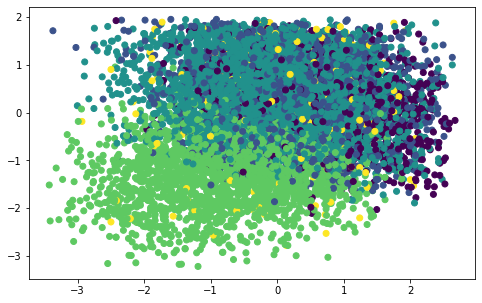

<IPython.core.display.Javascript object>

In [27]:
for k in range(2, 6):
    k_means = KMeans(n_clusters=k, random_state=66)
    k_means.fit(X_std)
    y_pred = k_means.predict(X_std)

    print("Clusters (k) = {k}".format(k=k))
    print(
        "Silhouette score: {sil}, ARI score: {ari}".format(
            sil=metrics.silhouette_score(X, y_pred, metric="euclidean"),
            ari=metrics.adjusted_rand_score(y, y_pred),
        )
    )

    plt.figure(figsize=(8, 5))
    plt.scatter(X_std[:, 0], X_std[:, 1], c=y_pred)
    plt.show()

In [28]:
k_means = KMeans(n_clusters=5, random_state=66)
k_means.fit(X_std)
y_pred = k_means.predict(X_std)

samp_spot["cluster"] = y_pred
samp_spot["cluster"] = samp_spot["cluster"].astype(str)

<IPython.core.display.Javascript object>

In [29]:
samp_spot.groupby("cluster").mean().style.background_gradient()

<IPython.core.display.Javascript object>

# Crosstab

In [30]:
pd.crosstab(
    samp_spot["cluster"], samp_spot["genre_label"], normalize="index"
).style.background_gradient(axis=0)

<IPython.core.display.Javascript object>

# Scatter plot by cluster

In [31]:
# Isolate numbers
nums_spot = spotify.select_dtypes("number")

<IPython.core.display.Javascript object>

In [32]:
@interact
def scatterplot(x=nums_spot.columns, y=nums_spot.columns, hue=["cluster"]):
    colours = ["r", "b", "g", "c", "m", "y", "k", "r", "burlywood", "chartreuse"]
    fig = px.scatter(
        x=x,
        y=y,
        color=hue,
        data_frame=samp_spot,
        hover_data=[
            "Performer",
            "Song",
            "genre_label",
            "cluster",
            "danceability",
            "energy",
            "speechiness",
        ],
        symbol="cluster",
    )
    fig.show()

interactive(children=(Dropdown(description='x', options=('spotify_track_duration_ms', 'spotify_track_popularit…

<IPython.core.display.Javascript object>

# Heriarchical analysis, 1000 rows

In [33]:
samp = model_df.sample(1000, axis=0, random_state=66)

X = samp.drop(columns=["genre_label"])
y = samp["genre_label"]

<IPython.core.display.Javascript object>

In [34]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

<IPython.core.display.Javascript object>

In [35]:
links = ["complete", "average", "single"]
affs = ["euclidean", "l1", "l2", "manhattan", "cosine"]

for link in links:
    for aff in affs:
        # Defining the agglomerative clustering
        agg_cluster = AgglomerativeClustering(linkage=link, affinity=aff, n_clusters=5)

        # Fit model
        clusters = agg_cluster.fit_predict(X_std)

        ari = (metrics.adjusted_rand_score(y, clusters),)
        sil = metrics.silhouette_score(X_std, clusters, metric=aff)

        print("Linkage = {link}, Affinity = {aff}".format(link=link, aff=aff))
        print("ARI score: {ari}, Silhouette score: {sil}".format(ari=ari, sil=sil))

Linkage = complete, Affinity = euclidean
ARI score: (0.019262654750539093,), Silhouette score: 0.2128274664315429
Linkage = complete, Affinity = l1
ARI score: (0.016301472014875484,), Silhouette score: 0.12485207752710935
Linkage = complete, Affinity = l2
ARI score: (0.019262654750539093,), Silhouette score: 0.2128274664315429
Linkage = complete, Affinity = manhattan
ARI score: (0.016301472014875484,), Silhouette score: 0.12485207752710935
Linkage = complete, Affinity = cosine
ARI score: (0.012412774342597839,), Silhouette score: 0.19923819674904328
Linkage = average, Affinity = euclidean
ARI score: (-0.00035656740854132476,), Silhouette score: 0.3483187326640927
Linkage = average, Affinity = l1
ARI score: (-0.0002607950933061663,), Silhouette score: 0.31297020812988374
Linkage = average, Affinity = l2
ARI score: (-0.00035656740854132476,), Silhouette score: 0.3483187326640927
Linkage = average, Affinity = manhattan
ARI score: (-0.0002607950933061663,), Silhouette score: 0.312970208129

<IPython.core.display.Javascript object>

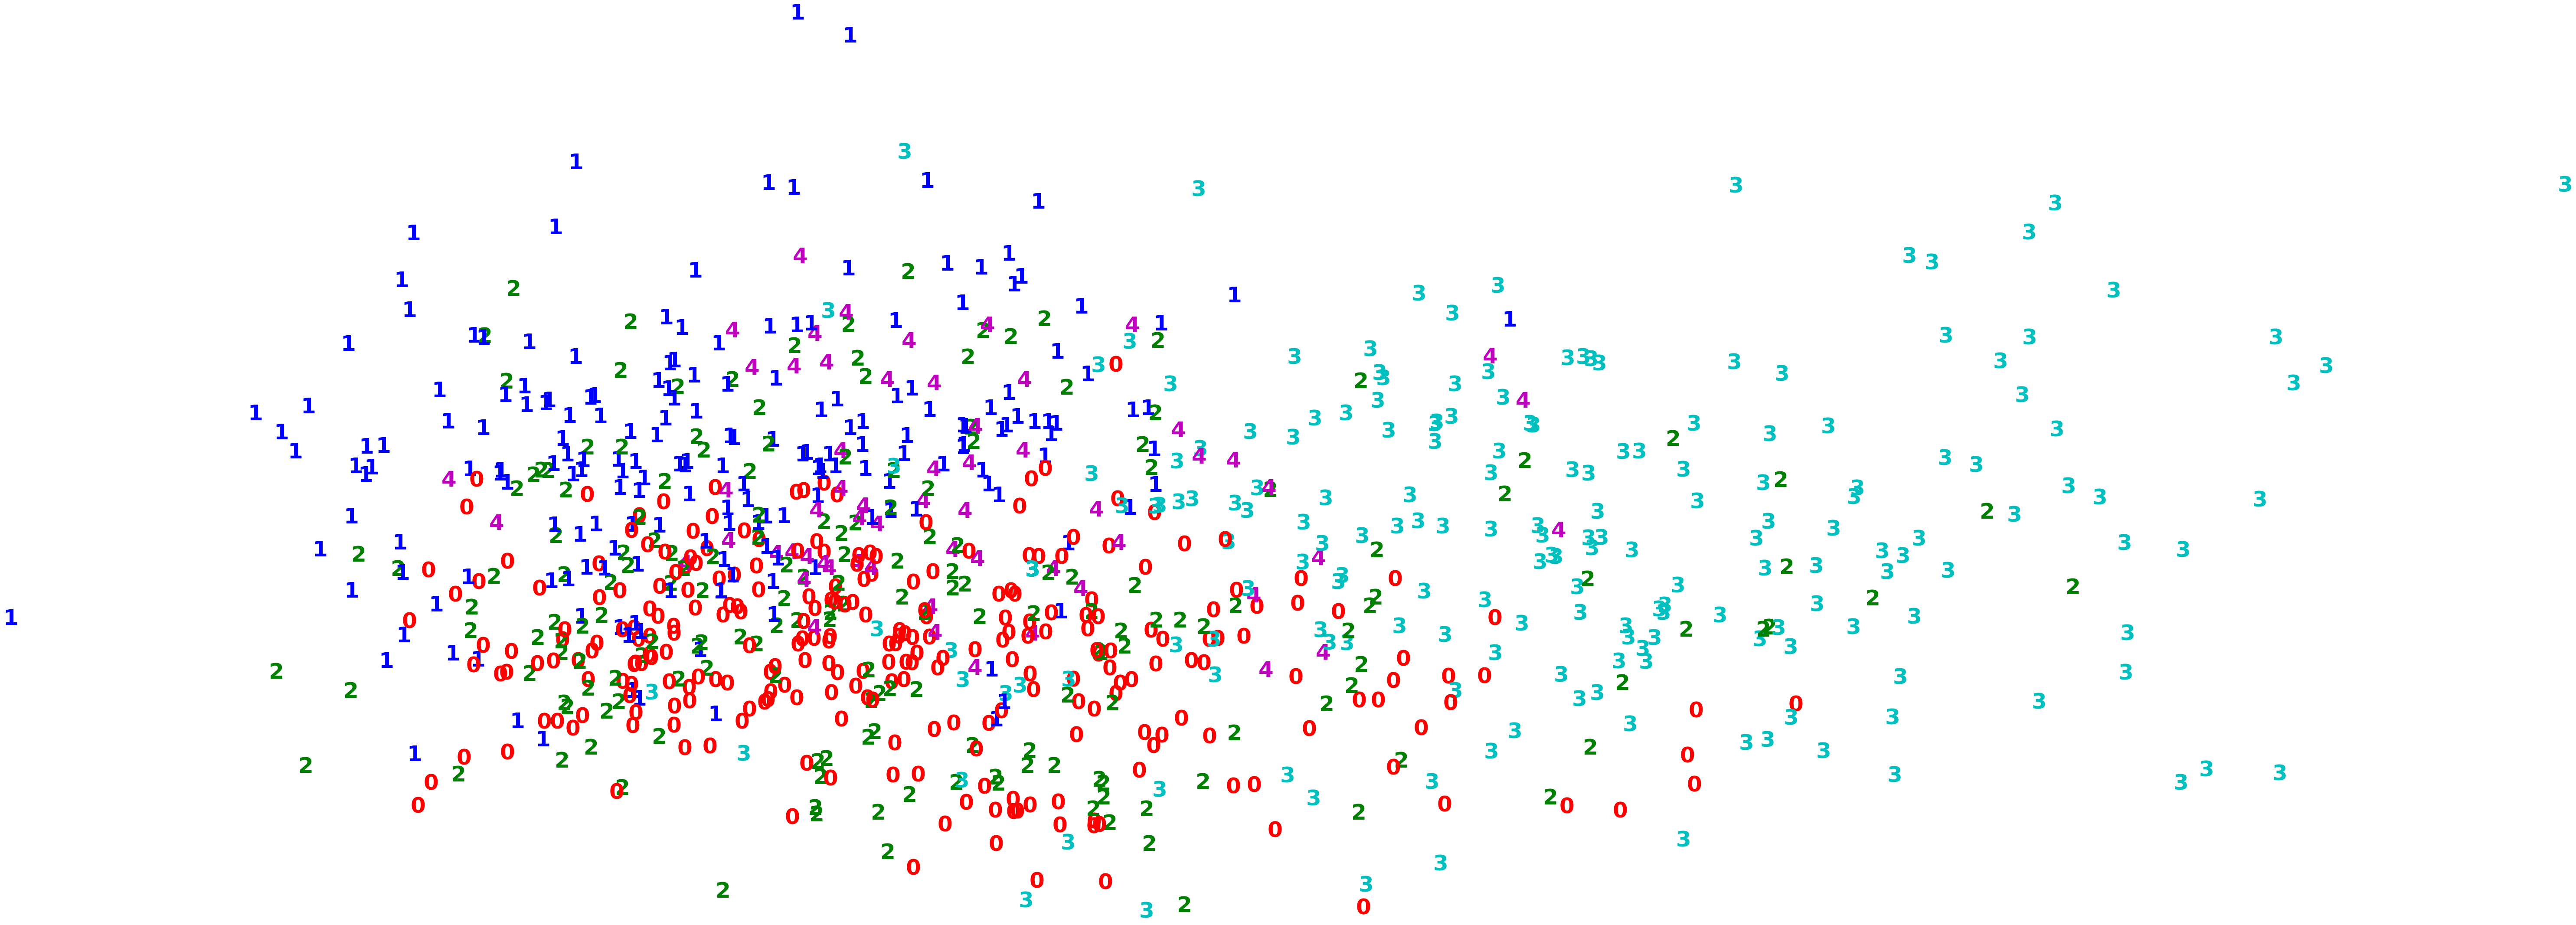

<IPython.core.display.Javascript object>

In [36]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(
    linkage="average", affinity="cosine", n_clusters=5
)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10, 5))
colours = ["r", "b", "g", "c", "m", "y", "k", "r", "burlywood", "chartreuse"]
for i in range(pca.shape[0]):
    plt.text(
        pca[i, 0],
        pca[i, 1],
        str(clusters[i]),
        color=colours[clusters[i]],
        fontdict={"weight": "bold", "size": 50},
    )

plt.xticks([])
plt.yticks([])
plt.axis("off")
plt.show()

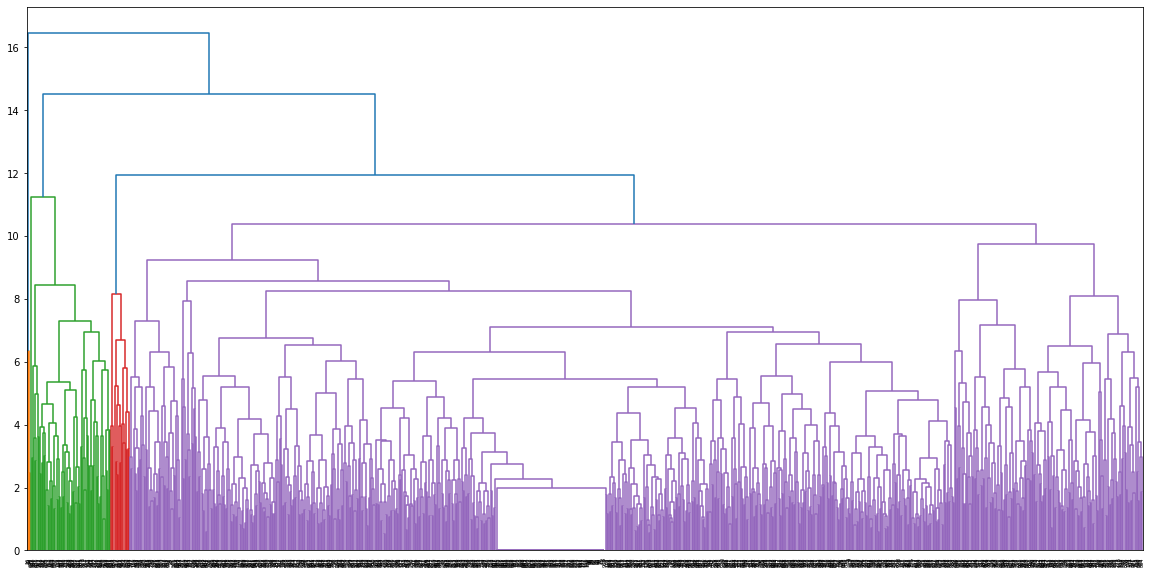

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(20, 10))
dendrogram(linkage(X_std, method="complete"))
plt.show()

# DBSCAN analysis

In [38]:
samp = model_df.sample(10000, axis=0, random_state=66)

X = samp.drop(columns=["genre_label"])
y = samp["genre_label"]
y = y.tolist()

<IPython.core.display.Javascript object>

In [39]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

<IPython.core.display.Javascript object>

-0.6382454621421081
0.006942427851165957


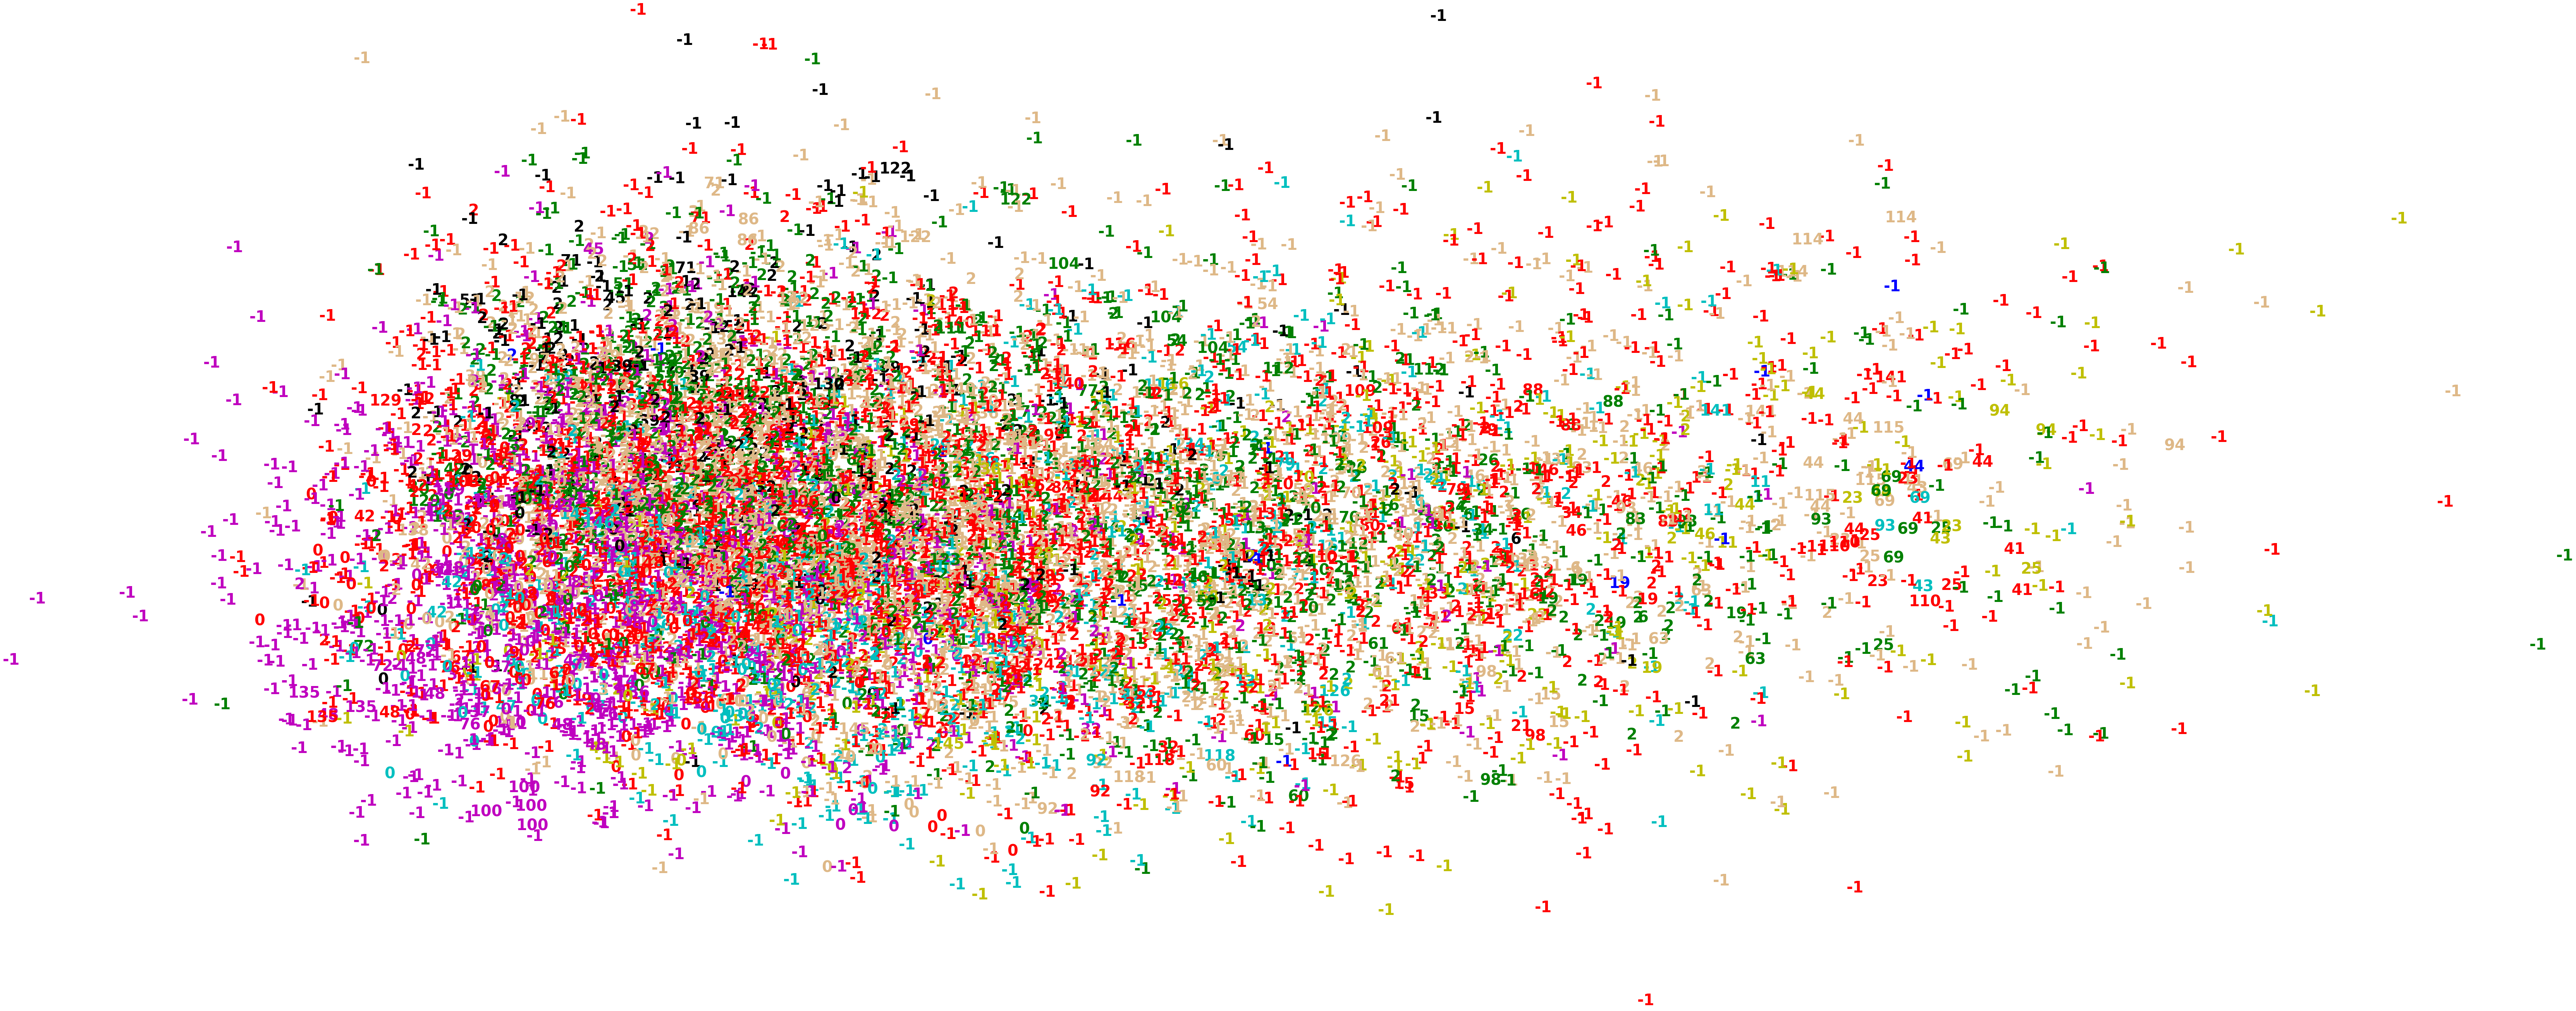

<IPython.core.display.Javascript object>

In [40]:
dbscan_cluster = DBSCAN(eps=1, min_samples=3)
clusters = dbscan_cluster.fit_predict(X_std)

print(metrics.silhouette_score(X, clusters))
print(metrics.adjusted_rand_score(y, clusters))

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10, 5))
colours = ["r", "b", "g", "c", "m", "y", "k", "r", "burlywood", "chartreuse"]
for i in range(pca.shape[0]):
    plt.text(
        pca[i, 0],
        pca[i, 1],
        str(clusters[i]),
        color=colours[y[i]],
        fontdict={"weight": "bold", "size": 40},
    )

plt.xticks([])
plt.yticks([])
plt.axis("off")
plt.show()

# Gaussian analysis

In [41]:
samp = model_df.sample(5000, axis=0, random_state=66)

X = samp.drop(columns=["genre_label"])
y = samp["genre_label"]
y = y.tolist()

<IPython.core.display.Javascript object>

In [42]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

<IPython.core.display.Javascript object>

0.012261226242983292
0.008997462135646754


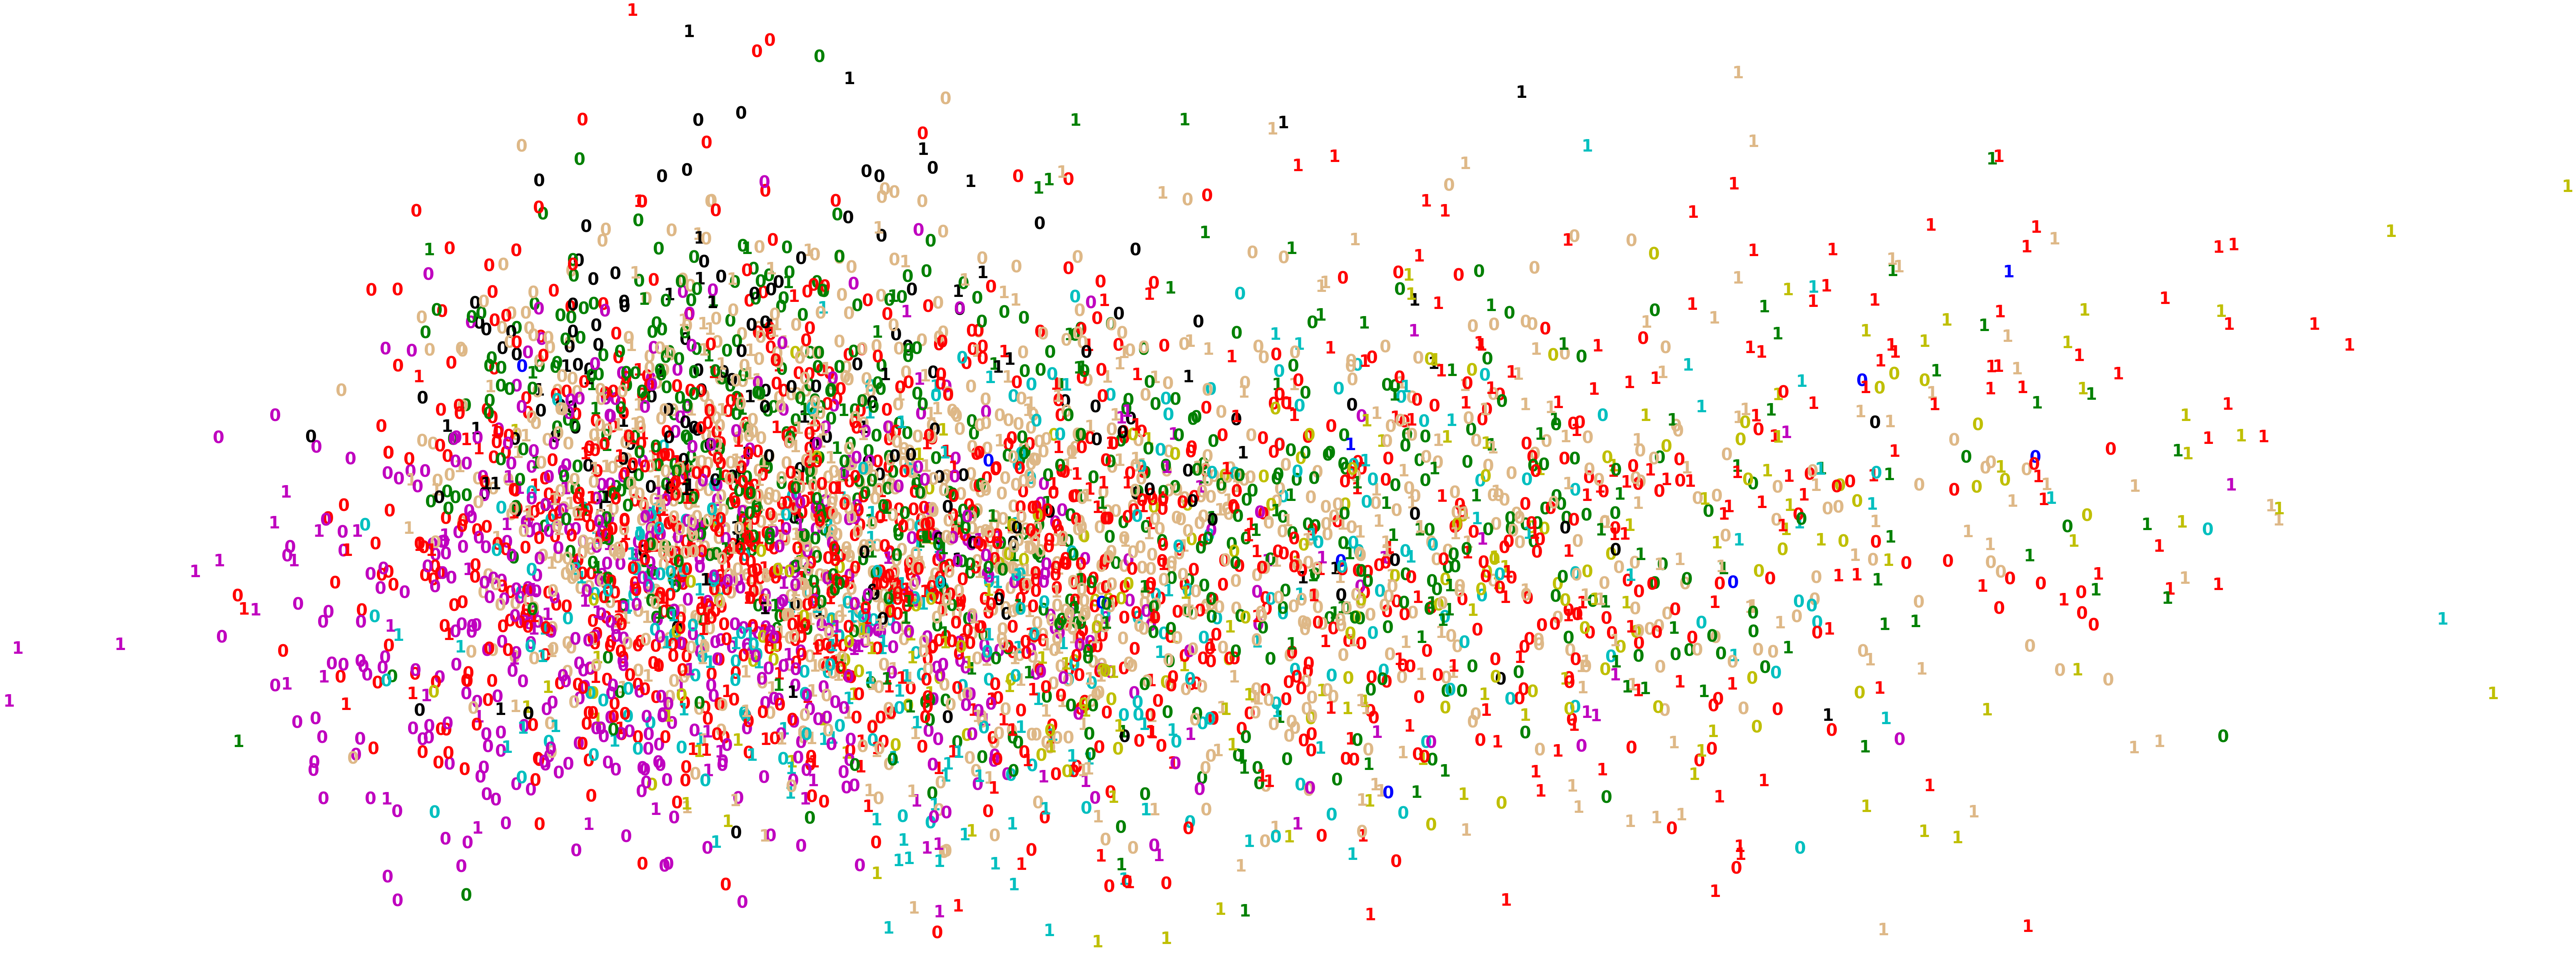

<IPython.core.display.Javascript object>

In [43]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=66)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print(metrics.silhouette_score(X, clusters))
print(metrics.adjusted_rand_score(y, clusters))

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10, 5))
colours = ["r", "b", "g", "c", "m", "y", "k", "r", "burlywood", "chartreuse"]
for i in range(pca.shape[0]):
    plt.text(
        pca[i, 0],
        pca[i, 1],
        str(clusters[i]),
        color=colours[y[i]],
        fontdict={"weight": "bold", "size": 40},
    )

plt.xticks([])
plt.yticks([])
plt.axis("off")
plt.show()

# PCA dimension reduction

In [44]:
samp = model_df.sample(10000, axis=0, random_state=66)

X = samp.drop(columns=["genre_label"])
X = X / 20

y = samp["genre_label"]
y = y.tolist()

<IPython.core.display.Javascript object>

In [45]:
pca = PCA(n_components=2)

pca_components = pca.fit_transform(X)

<IPython.core.display.Javascript object>

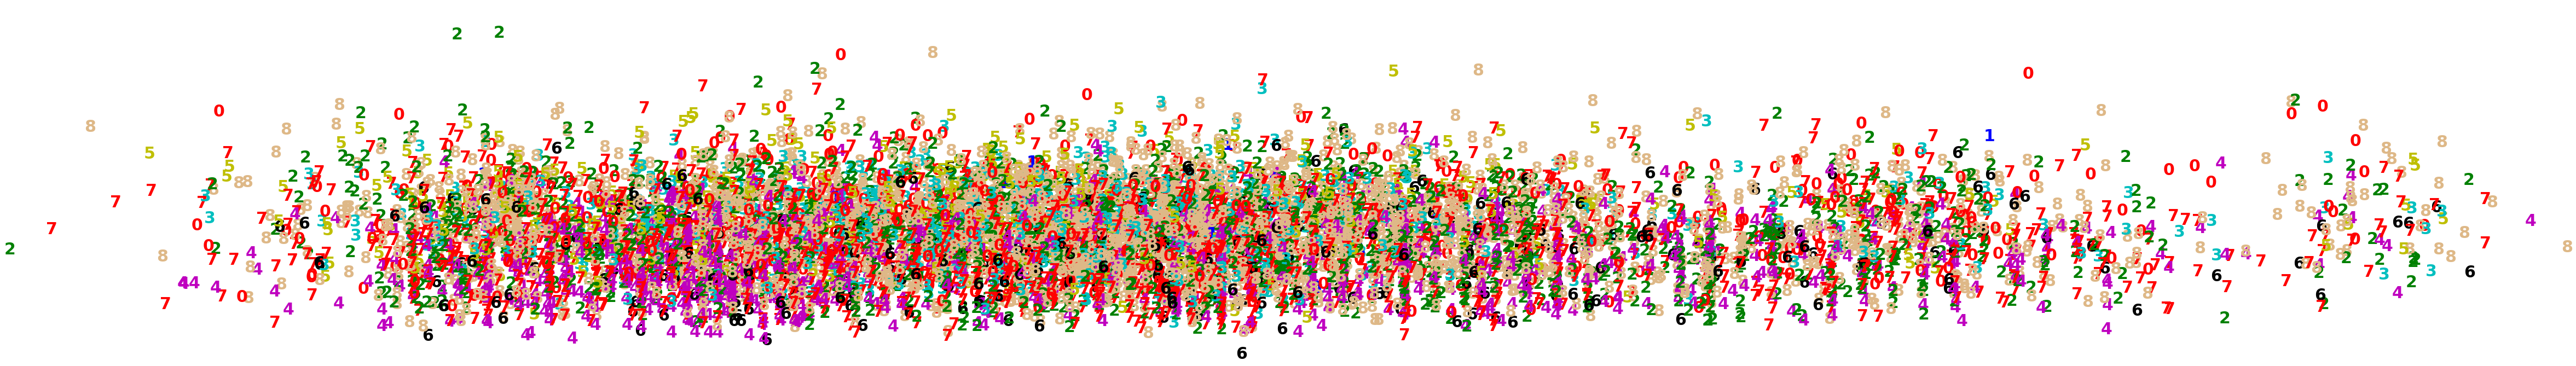

<IPython.core.display.Javascript object>

In [46]:
plt.figure(figsize=(10, 8))
colours = ["r", "b", "g", "c", "m", "y", "k", "r", "burlywood", "chartreuse"]
for i in range(pca_components.shape[0]):
    plt.text(
        pca_components[i, 0],
        pca_components[i, 1],
        str(y[i]),
        color=colours[int(y[i])],
        fontdict={"weight": "bold", "size": 30},
    )

plt.xticks([])
plt.yticks([])
plt.axis("off")
plt.show()

# t-SNE dimension reduction

In [64]:
samp = model_df.sample(1000, axis=0, random_state=66)

X = samp.drop(columns=["genre_label"])
y = samp["genre_label"]
y = y.tolist()

<IPython.core.display.Javascript object>

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.004s...
[t-SNE] Computed neighbors for 1000 samples in 0.083s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 3.303787
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.032856
[t-SNE] KL divergence after 300 iterations: 0.326839


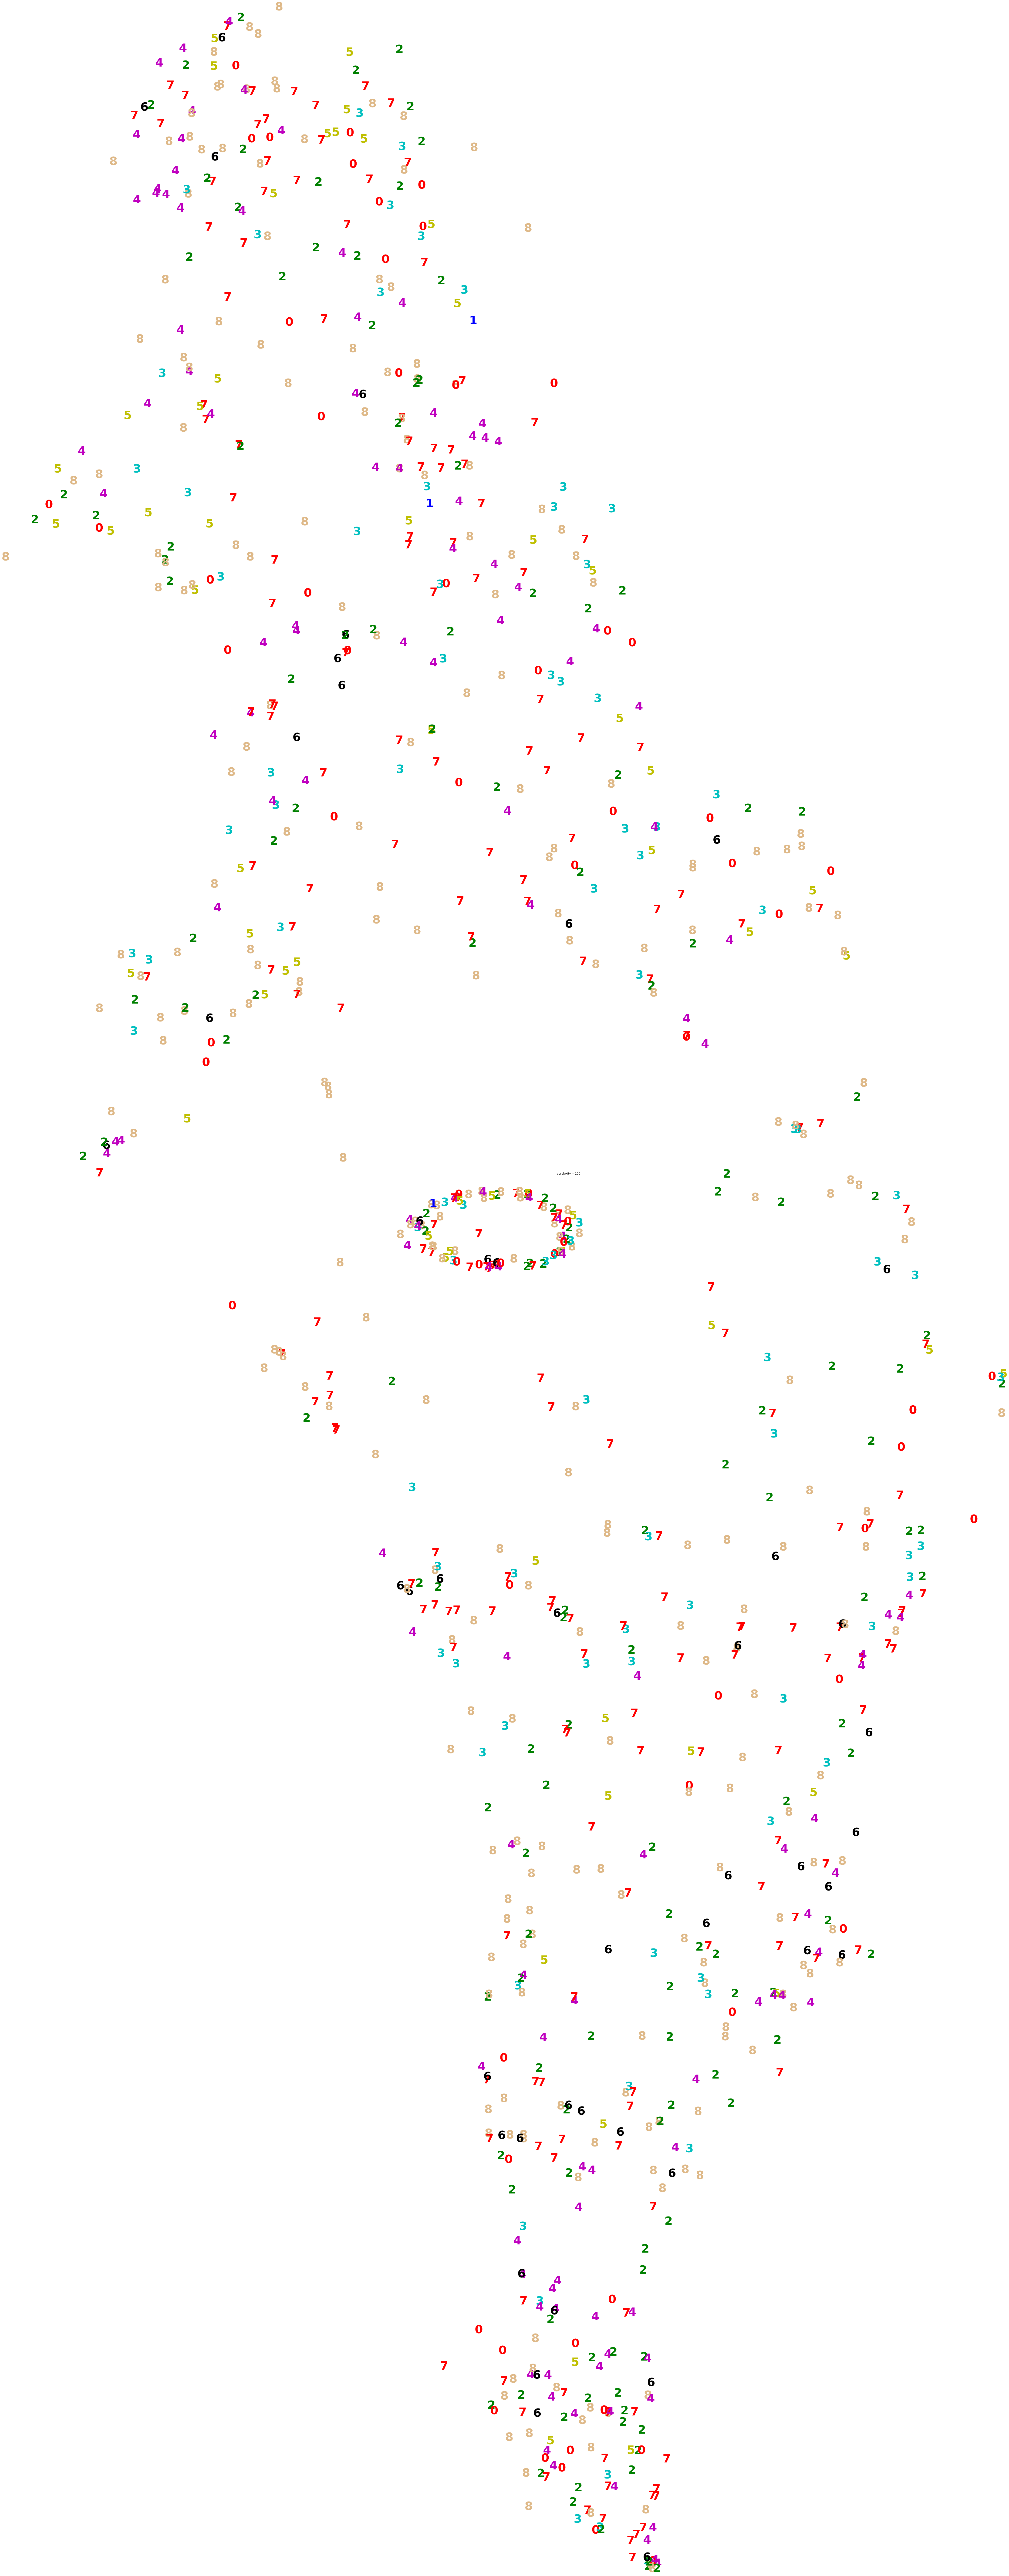

<IPython.core.display.Javascript object>

In [65]:
for perp in range(100, 101):
    tsne = TSNE(n_components=2, verbose=1, perplexity=perp, n_iter=300)
    tsne_components = tsne.fit_transform(X)

    plt.figure(figsize=(10, 5))
    colours = ["r", "b", "g", "c", "m", "y", "k", "r", "burlywood", "chartreuse"]
    for i in range(tsne_components.shape[0]):
        plt.text(
            tsne_components[i, 0],
            tsne_components[i, 1],
            str(y[i]),
            color=colours[int(y[i])],
            fontdict={"weight": "bold", "size": 50},
        )

    plt.xticks([])
    plt.yticks([])
    plt.axis("off")
    plt.title("perplexity = " + str(perp))
    plt.show()

# UMAP dimension reduction

In [71]:
samp = model_df.sample(1000, axis=0, random_state=66)

X = samp.drop(columns=["genre_label"])
y = samp["genre_label"]
y = y.tolist()

<IPython.core.display.Javascript object>

In [75]:
for neigh in range(9, 10):
    umap = UMAP(n_neighbors=neigh, min_dist=0.3, metric="correlation")
    umap_components = umap.fit_transform(X)

    plt.figure(figsize=(10, 5))
    colours = ["r", "b", "g", "c", "m", "y", "k", "r", "burlywood", "chartreuse"]
    for i in range(umap_components.shape[0]):
        plt.text(
            umap_components[i, 0],
            umap_components[i, 1],
            str(y[i]),
            color=colours[int(y[i])],
            fontdict={"weight": "bold", "size": 50},
        )

    plt.xticks([])
    plt.yticks([])
    plt.axis("off")
    plt.title("perplexity = " + str(perp))
    plt.show()

NameError: name 'UMAP' is not defined

<IPython.core.display.Javascript object>

# Plotly interactive plots

In [80]:
@interact
def scatterplot(x=nums_spot.columns, y=nums_spot.columns, hue="cluster"):
    colours = ["r", "b", "g", "c", "m", "y", "k", "r", "burlywood", "chartreuse"]
    fig = px.scatter(
        x=x,
        y=y,
        color=hue,
        data_frame=samp_spot,
        labels={
            "spotify_track_duration_ms": "Track length (seconds)",
            "danceability": "Danceability",
            "genre_label": "Genre",
            "speechiness": "Speechiness",
            "energy": "Energy",
            "spotify_track_popularity": "Popularity",
            "cluster": "Cluster",
        },
        hover_data=[
            "Performer",
            "Song",
            "genre_label",
            "cluster",
            "danceability",
            "energy",
            "speechiness",
        ],
    )
    fig.update_layout(
        font=dict(
            family="Arial, monospace",
            size=18,
        )
    )
    fig.show()

interactive(children=(Dropdown(description='x', options=('spotify_track_duration_ms', 'spotify_track_popularit…

<IPython.core.display.Javascript object>

In [78]:
@interact
def boxplot(y=nums_spot.columns, hue=["cluster"]):
    plt.figure(figsize=(8, 5))
    fig = px.box(
        x="cluster",
        y=y,
        color=hue,
        data_frame=samp_spot,
        labels={
            "spotify_track_duration_ms": "Track length (seconds)",
            "danceability": "Danceability",
            "genre_label": "Genre",
            "speechiness": "Speechiness",
            "energy": "Energy",
            "spotify_track_popularity": "Popularity",
            "cluster": "Cluster",
        },
    )
    fig.update_layout(
        font=dict(
            family="Arial, monospace",
            size=18,
        )
    )
    fig.show()

interactive(children=(Dropdown(description='y', options=('spotify_track_duration_ms', 'spotify_track_popularit…

<IPython.core.display.Javascript object>

# Music sound files, spectral analysis of those files, coversion of the WAV files into PNG image files.

# --------------------------------------------------------------------------------------------------
# https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification
# --------------------------------------------------------------------------------------------------

In [ ]:
genre_df = pd.read_csv("data/features_30_sec.csv")

In [ ]:
genre_df.head()

In [ ]:
genre_df.isna().mean()

In [ ]:
genre_df.info()

In [ ]:
genre_df.describe()

In [ ]:
nums_gen = genre_df.select_dtypes("number")


@interact
def boxplot(y=nums_gen.columns, hue=["label"]):
    plt.figure(figsize=(15, 8))
    fig = px.box(
        x="label",
        y=y,
        color=hue,
        data_frame=genre_df,
        labels={
            "spotify_track_duration_ms": "Track length (seconds)",
            "danceability": "Danceability",
            "genre_label": "Genre",
            "speechiness": "Speechiness",
            "energy": "Energy",
            "spotify_track_popularity": "Popularity",
            "cluster": "Cluster",
        },
    )
    fig.show()

In [ ]:
@interact
def scatterplot(x=nums_gen.columns, y=nums_gen.columns, hue=["label"]):
    plt.figure(figsize=(15, 8))
    fig = px.scatter(
        x=x,
        y=y,
        color=hue,
        data_frame=genre_df,
        labels={
            "spotify_track_duration_ms": "Track length (seconds)",
            "danceability": "Danceability",
            "genre_label": "Genre",
            "speechiness": "Speechiness",
            "energy": "Energy",
            "spotify_track_popularity": "Popularity",
            "cluster": "Cluster",
        },
    )
    fig.show()

# Spectral analysis

In [ ]:
#!pip install librosa
import librosa
import librosa.display

In [ ]:
for genre in genre_list:
    genre = genre.replace(" ", "")
    y, sr = librosa.load(
        "data/genres_original/{genre}/{genre}.00000.wav".format(genre=genre)
    )
    librosa.feature.melspectrogram(y=y, sr=sr)

    D = np.abs(librosa.stft(y)) ** 2
    S = librosa.feature.melspectrogram(S=D, sr=sr)

    # Passing through arguments to the Mel filters
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

    plt.figure(figsize=(10, 4))
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sr, fmax=8000)
    plt.colorbar(format="%+2.0f dB")
    plt.title("Mel-frequency spectrogram: " + genre)
    plt.tight_layout()
    plt.show()